In [1]:
import numpy as np
from interpreter.adiabatic import transpile_two
from interpreter.gate import GateBasedInterpreter
from interpreter.adiabatic import AdiabaticInterpreter
from qiskit import QuantumCircuit
from qiskit.algorithms import AmplificationProblem
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


/var/folders/qc/8g6tlds939q74vlq2rj198h00000gn/T/ipykernel_74262/193610474.py:6: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import AmplificationProblem


  0%|          | 0/5 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/envs/quantum/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/quantum/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
/opt/homebrew/Caskroom/miniconda/base/envs/quantum/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
100%|██████████| 5/5 [00:00<00:00, 53.45it/s]


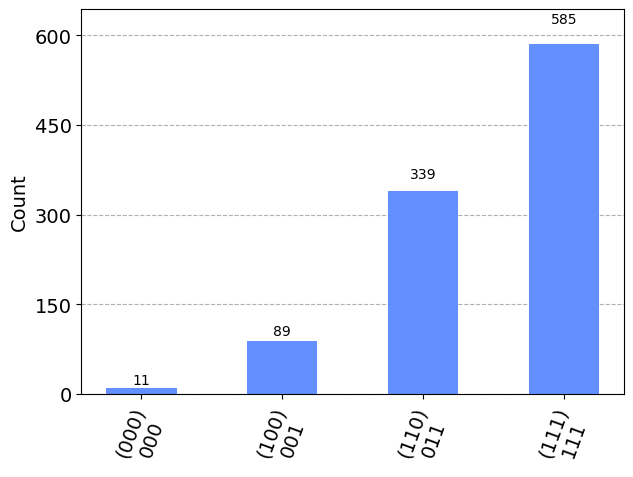

In [2]:
n = 3
qc = QuantumCircuit(n)
qc.x(range(n))

plot_histogram(AdiabaticInterpreter(info=False).run(qc, all_histories=True))

In [3]:
one_x, one_h, n_x, n_h = [],[],[],[]
range_n, range_n_2 = range(2,11), range(2,6)

for n in range_n:
    qc = QuantumCircuit(1)
    for _ in range(n):
        qc.x(0)
    one_x.append(sum(AdiabaticInterpreter(info=False).run(qc).values())/1024)

    qc = QuantumCircuit(1)
    for _ in range(n):
        qc.h(0)
    one_h.append(sum(AdiabaticInterpreter(info=False).run(qc).values())/1024)

for n in range_n_2:
    qc = QuantumCircuit(n)
    qc.x(range(n))
    n_x.append(sum(AdiabaticInterpreter(info=False).run(qc).values())/1024)

    qc = QuantumCircuit(n)
    qc.h(range(n))
    n_h.append(sum(AdiabaticInterpreter(info=False).run(qc).values())/1024)

plt.plot(range_n, [1/i for i in range_n], label="Theoritcal Probability")
plt.xlabel("L, Number of Gates")
plt.ylabel("Probability")
plt.plot(range_n, one_x, label="X on 1-qubit")
plt.plot(range_n, one_h, label="H on 1-qubit")
plt.plot(range_n_2, n_x, label="X on n-qubit")
plt.plot(range_n_2, n_h, label="H on n-qubit")
plt.legend()

  0%|          | 0/4 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/envs/quantum/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/quantum/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
/opt/homebrew/Caskroom/miniconda/base/envs/quantum/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
 83%|████████▎ | 10/12 [00:13<00:02,  1.05s/it]

In [ ]:
for n in range(3, 10):
    good_state = "1" * n

    oracle = Statevector.from_label(good_state)
    problem = AmplificationProblem(oracle, is_good_state=[good_state])
    oracle = problem.grover_operator.decompose()

    qc = QuantumCircuit(n)
    exp2_n = 2**n
    qc = QuantumCircuit(n)
    qc.h(range(n))
    for _ in range(max(1, int((np.pi / (2 * np.arcsin(1 / np.sqrt(exp2_n))) - 1) / 2))):
        qc.compose(oracle, inplace=True)

    print(f"n={n}, L={qc.size()}, L_2={transpile_two(qc).size()}")
    res = GateBasedInterpreter().run(qc)
    if max(res, key=res.get) != good_state:
        raise


In [ ]:
from qiskit.circuit.library import QFT

for n in range(3, 10):
    qc = QuantumCircuit(n)
    qc.compose(QFT(n).decompose(), inplace=True)
    qc.compose(QFT(n, inverse=True).decompose(), inplace=True)

    print(f"n={n}, L={qc.size()}, L_2={transpile_two(qc).size()}")
    res = GateBasedInterpreter().run(qc)
    if max(res, key=res.get) != "0"*n:
        raise
